In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()

In [2]:
cm.update('livereveal', {
              'width': 1000,
              'height': 600,
              'scroll': True,
})

{'width': 1000, 'height': 600, 'scroll': True}

In [19]:
import pandas as pd
import os
import re
import textblob
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from gensim import corpora
import gensim
import string

In [4]:
cwd = os.getcwd()
url = cwd + '/Dataset_670/airline.csv'
airline = pd.read_csv(url, encoding = "latin-1", index_col = 0)

In [5]:
#Data Cleaning

airline.columns

Index(['link', 'title', 'author', 'author_country', 'date', 'content',
       'aircraft', 'type_traveller', 'cabin_flown', 'route', 'overall_rating',
       'seat_comfort_rating', 'cabin_staff_rating', 'food_beverages_rating',
       'inflight_entertainment_rating', 'ground_service_rating',
       'wifi_connectivity_rating', 'value_money_rating', 'recommended'],
      dtype='object')

In [6]:
airline.isnull()

,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
airline_name,,,,,,,,,,,,,,,,,,,
adria-airways,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,True,False,False
adria-airways,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,True,False,False
adria-airways,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,True,False,False
adria-airways,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,True,False,False
adria-airways,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,True,False,False
adria-airways,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,True,False,False
adria-airways,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,True,False,False
adria-airways,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,True,False,False
adria-airways,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,True,False,False


In [7]:
airline.dropna(thresh=1)

,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
airline_name,,,,,,,,,,,,,,,,,,,
adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,NaN,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1
adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,NaN,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1
adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,NaN,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1
adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,NaN,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1
adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,NaN,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0
adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Dzano Edin,Germany,2014-06-08,Sarajevo-Frankfurt via Ljubljana. I loved flyi...,NaN,NaN,Economy,NaN,9.0,4.0,4.0,3.0,3.0,NaN,NaN,4.0,1
adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,M Tushishvili,France,2014-06-01,I had flights from Paris to Sarajevo via Ljubl...,NaN,NaN,Economy,NaN,5.0,4.0,4.0,1.0,0.0,NaN,NaN,3.0,1
adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,M Znidar,Slovenia,2014-05-10,LJU to FRA and back both flights were on time....,NaN,NaN,Economy,NaN,9.0,5.0,5.0,4.0,3.0,NaN,NaN,4.0,1
adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-01-13,On my Ljubljana - Munich flight in business cl...,NaN,NaN,Business Class,NaN,8.0,4.0,3.0,4.0,1.0,NaN,NaN,4.0,1


In [8]:
airline.shape

(41396, 19)

In [17]:
from bs4 import BeautifulSoup
def review_to_words( raw_review ):
    
    
    # 1. Remove non-letters with regex
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    
    # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()                           
    
    # 3. Create set of stopwords for reviews
    stops = set(stopwords.words("english"))                  
    
    # 4. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    
    # 5. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   


airline["content"]=airline["content"].apply(review_to_words)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, color, title = None):
    wordcloud = WordCloud(
        background_color= color,
        stopwords=stopwords,
        max_words=250,
        max_font_size=40, 
        scale=3,
        random_state=0 
).generate(str(data))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

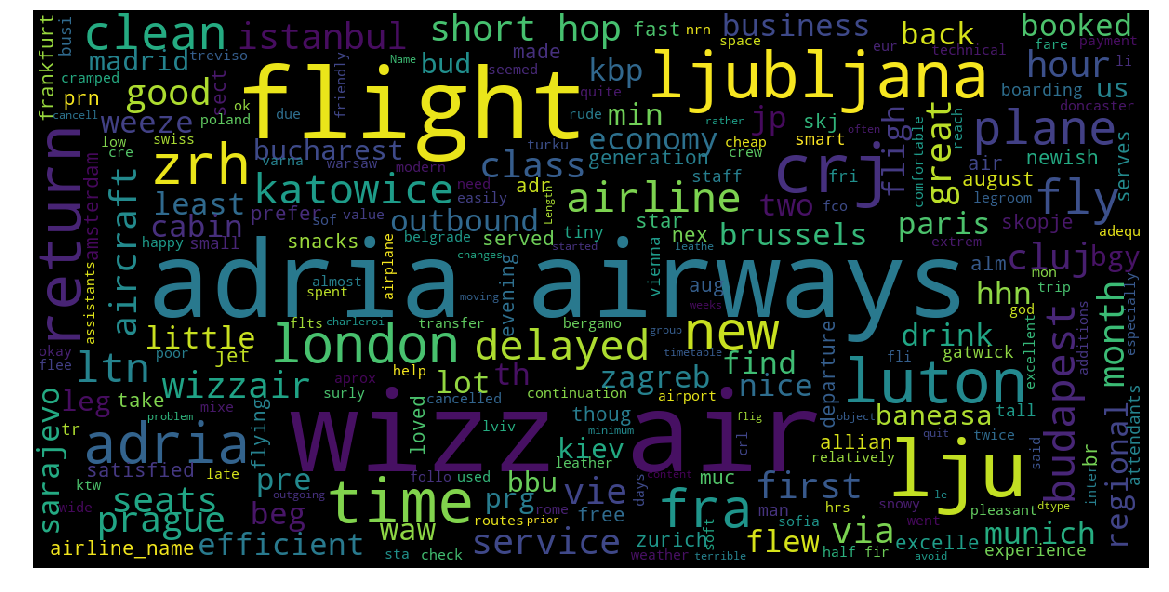

In [10]:
show_wordcloud(airline["content"],'black')

In [22]:
dfList = airline['content'].tolist()

from wordcloud import WordCloud, STOPWORDS

tweetList=[]
stops = set(STOPWORDS)
stemmer = nltk.stem.SnowballStemmer('english')
lemmatizer = nltk.wordnet.WordNetLemmatizer()

for tweet in dfList:
    rawTweet = tweet
    #print(rawTweet)
    #print(processedTweet)
    processedTweet = rawTweet.strip()
    processedTweet = processedTweet.translate(str.maketrans('','',string.punctuation))
    processedTweet = review_to_words(processedTweet)
    tweetTokens = nltk.word_tokenize(processedTweet)

    for token in tweetTokens:
        if token in stops:
            tweetTokens.remove(token)

    for token in tweetTokens:
        oldToken = token
        tweetTokens.remove(token)
        oldToken = lemmatizer.lemmatize(oldToken)
        tweetTokens.append(oldToken)

    processedTweet = ' '.join(tweetTokens)
    #print(processedTweet)

    if len(tweetTokens) > 3:
        tweetList.append(processedTweet)
#print(tweetList)

texts = [[text for text in doc.split()] for doc in tweetList]
#print(texts)
dictionary = corpora.Dictionary(texts)
#print("printing dictionary",dictionary.token2id)
print(dictionary)
doc_term_matrix = [dictionary.doc2bow(doc.split()) for doc in tweetList]
#print(doc_term_matrix)
ldaObject = gensim.models.ldamodel.LdaModel
ldaModel = ldaObject(doc_term_matrix,num_topics=3,id2word=dictionary,passes=20)
print(ldaModel.print_topics(num_topics=3, num_words=10))
print("LDA analysis complete")

Dictionary(28639 unique tokens: ['airport', 'chaos', 'check', 'complimentary', 'crews']...)
[(0, '0.041*"flight" + 0.012*"hour" + 0.010*"plane" + 0.009*"airline" + 0.008*"time" + 0.007*"one" + 0.007*"told" + 0.007*"back" + 0.007*"delayed" + 0.007*"airport"'), (1, '0.023*"flight" + 0.017*"seat" + 0.017*"food" + 0.015*"good" + 0.015*"service" + 0.011*"class" + 0.010*"crew" + 0.009*"cabin" + 0.009*"business" + 0.008*"economy"'), (2, '0.031*"flight" + 0.018*"check" + 0.018*"time" + 0.015*"boarding" + 0.010*"crew" + 0.009*"staff" + 0.008*"airport" + 0.008*"return" + 0.007*"luggage" + 0.007*"good"')]
LDA analysis complete


In [23]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [ ]:
vis_data = gensimvis.prepare(ldaModel, doc_term_matrix, dictionary)
pyLDAvis.display(vis_data)

In [25]:
vis_data = gensimvis.prepare(ldaModel, doc_term_matrix, dictionary)
pyLDAvis.display(vis_data)